In [1]:
# imports and setup
import numpy as np
from scipy.stats import norm, invgamma
import scipy.integrate as integrate
import matplotlib.pyplot as plt

## Discrete Bayes Problem

In [2]:
def bucket_probability(dist_space, start_b, end_b):
  """Calculate probability of a bucket given the distribution"""
  cdf_start_b = dist_space.cdf(start_b)
  cdf_end_b = dist_space.cdf(end_b)
  return cdf_end_b - cdf_start_b

In [3]:
def create_buckets(start_b, end_b, number_of_buckets, include_mid_point = False):
  """Dividing into equal sized buckets"""
  bp = np.linspace(start_b, end_b, number_of_buckets+1)
  buckets = []
  for i in range(len(bp)-1):
    if include_mid_point:
      buckets.append((bp[i], bp[i+1], (bp[i]+bp[i+1])/2))
    else:
      buckets.append((bp[i], bp[i+1]))
  return buckets

In [4]:
def prior_probability(mu0, std0, prior_buckets):
  """Dividing prior parameter space into buckets and calculating probability of each bucket"""
  prior_space = norm(loc=mu0, scale=std0)
  prior_prob = []
  for i, j, _ in prior_buckets:
    prior_prob.append(bucket_probability(prior_space, i, j))
  return prior_prob

In [5]:
prior_mean = 3
prior_std = 1
num_of_buckets = 12

prior_buckets = create_buckets(prior_mean-3*prior_std, prior_mean+3*prior_std, num_of_buckets, True)

prior_prob = prior_probability(prior_mean, prior_std, prior_buckets)
prior_prob

[0.004859767294146039,
 0.016540466622403063,
 0.04405706932067888,
 0.091848052662599,
 0.1498822847945298,
 0.19146246127401312,
 0.19146246127401312,
 0.1498822847945298,
 0.09184805266259899,
 0.04405706932067888,
 0.01654046662240305,
 0.004859767294146056]

In [6]:
def likelihood_probability(std1, likelihood_buckets, prior_prob, prior_buckets):
  """Calculating probability of going from every prior bucket to every likelihood bucket"""
  likelihood_matrix = []

  for i in range(len(prior_prob)):
    prob_i = prior_prob[i]
    start_i, end_i, _ = prior_buckets[i]
    likelihood_i = []
    for j in range(len(likelihood_buckets)):
      start_j, end_j = likelihood_buckets[j]
      prob_ij, _ = integrate.quad(lambda mu: bucket_probability(norm(loc=mu, scale=std1), start_j, end_j) * prob_i, start_i, end_i)
      likelihood_i.append(prob_ij)

    likelihood_matrix.append(likelihood_i)

  likelihood_matrix = np.asarray(likelihood_matrix)
  return likelihood_matrix

In [7]:
likelihood_std = 0.5

likelihood_buckets = create_buckets(prior_mean-3*prior_std-3*likelihood_std, prior_mean+3*prior_std+3*likelihood_std, num_of_buckets)
likelihood_prob = likelihood_probability(likelihood_std, likelihood_buckets, prior_prob, prior_buckets)

likelihood_prob

array([[6.54310504e-05, 7.00594145e-04, 1.25353670e-03, 3.89707692e-04,
        1.95624139e-05, 1.40285447e-07, 1.29511308e-10, 1.43641106e-14,
        1.76137863e-19, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.60323804e-05, 6.02727257e-04, 3.51629837e-03, 3.51629837e-03,
        6.02727257e-04, 1.60323804e-05, 5.86239432e-08, 2.68692874e-11,
        1.45521723e-15, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.27178223e-06, 1.77346481e-04, 3.53296316e-03, 1.13641559e-02,
        6.35135860e-03, 5.93176617e-04, 8.24567927e-06, 1.52173306e-08,
        3.44034648e-12, 9.07041421e-17, 0.00000000e+00, 0.00000000e+00],
       [3.17243568e-08, 1.71901944e-05, 1.23662599e-03, 1.32410060e-02,
        2.36914441e-02, 7.36535116e-03, 3.69723387e-04, 2.65135023e-06,
        2.44772245e-09, 2.71477112e-13, 3.32894945e-18, 0.00000000e+00],
       [2.43477423e-10, 5.31223862e-07, 1.45278236e-04, 5.46164389e-03,
        3.18631176e-02, 3.18631176e-02, 5.46164389e-03, 1.45

In [8]:
evidence_prob = []

for i in range(12):
  evidence_prob.append(sum(likelihood_prob[:,i]))

evidence_prob

[8.276718140751229e-05,
 0.0014983944187436265,
 0.00969029572395845,
 0.034779888817666804,
 0.08060746272723257,
 0.12266527105455974,
 0.12266527105455972,
 0.08060746272723258,
 0.0347798888176668,
 0.00969029572395845,
 0.0014983944187436273,
 8.27671814075136e-05]

In [9]:
posterior_prob = []
for i in range(len(prior_prob)):
  temp = []
  for j in range(len(evidence_prob)):
    temp.append(likelihood_prob[i,j] / evidence_prob[j])

  posterior_prob.append(temp)

posterior_prob = np.asarray(posterior_prob).T
posterior_prob

array([[7.90543417e-01, 1.93704559e-01, 1.53657791e-02, 3.83296329e-04,
        2.94171456e-06, 6.83735670e-09, 4.75847873e-12, 9.83495813e-16,
        6.00034531e-20, 1.07573786e-24, 5.64736712e-30, 8.65766965e-36],
       [4.67563237e-01, 4.02248734e-01, 1.18357676e-01, 1.14724095e-02,
        3.54528724e-04, 3.40525554e-06, 9.97801395e-09, 8.80031613e-12,
        2.31368792e-15, 1.80048957e-19, 4.12541171e-24, 2.77199370e-29],
       [1.29360005e-01, 3.62868014e-01, 3.64587755e-01, 1.27614887e-01,
        1.49921364e-02, 5.70353031e-04, 6.82447865e-06, 2.51259022e-08,
        2.80153265e-11, 9.35236040e-15, 9.27024267e-19, 2.71170786e-23],
       [1.12049723e-02, 1.01101484e-01, 3.26745034e-01, 3.80708693e-01,
        1.57034541e-01, 2.21596256e-02, 1.03030613e-03, 1.52738804e-05,
        7.03775236e-08, 9.89177048e-11, 4.18401934e-14, 5.27409875e-18],
       [2.42687380e-04, 7.47731335e-03, 7.87936797e-02, 2.93911299e-01,
        3.95287440e-01, 1.90472328e-01, 3.19798781e-02, 1.80

In [10]:
sum(posterior_prob[0])

0.9999999999999999

## Testing

In [11]:
observed_data = norm.rvs(loc=2, scale=0.5, size=10)
observed_data

array([1.27667071, 1.22787334, 1.78157338, 2.04325042, 2.49406211,
       2.02910087, 2.19679839, 2.45735056, 1.35625202, 2.57197111])

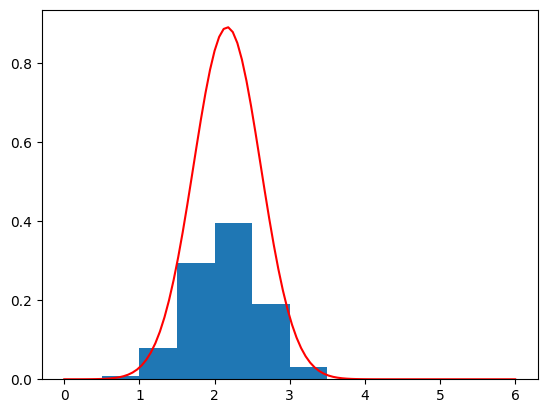

In [12]:
bar_x = []
bar_xx = []
for i,j,k in prior_buckets:
  bar_x.append(k)
  bar_xx.extend([i,j])

# x = [observed_data[0]]
x = [1.9587854306724626]

actual_mean = (likelihood_std**2 * prior_mean + prior_std**2 * np.sum(x)) / (len(x) * prior_std**2 + likelihood_std**2)
actual_std = np.sqrt(1 / (1/prior_std**2 + len(x)/likelihood_std**2))
line_x = np.linspace(prior_buckets[0][0], prior_buckets[-1][1], 100)
actual_pdf = norm.pdf(line_x, actual_mean, actual_std)
observed_pdf = []

for i in range(len(likelihood_buckets)):
  b_i, b_j = likelihood_buckets[i]
  if x >= b_i and x < b_j:
    observed_pdf = posterior_prob[i]
    plt.bar(bar_x, observed_pdf, width=0.5)
    plt.plot(line_x, actual_pdf, color='r')
    plt.show()
    break

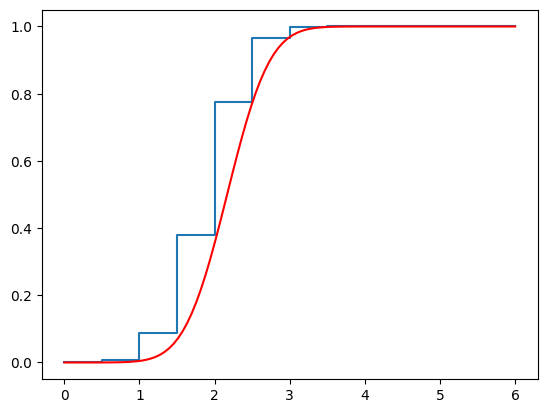

In [13]:
actual_cdf = norm.cdf(line_x, actual_mean, actual_std)
observed_cdf = np.cumsum(observed_pdf)
observed_cdf = np.repeat(observed_cdf, 2)
plt.plot(bar_xx, observed_cdf)
plt.plot(line_x, actual_cdf, color='r')
plt.show()

### KS Test

The KS test measures the maximum difference between the empirical cumulative distribution function (CDF) of the data and the CDF of the fitted distribution

In [14]:
ks_statistic = np.max(np.abs(observed_cdf - norm.cdf(bar_xx, actual_mean, actual_std)))
ks_statistic

0.4213193105381274

Thoughts:

Can be observed that larger the length of the steps, greater the difference because the buckets smooth over more values.

### L1 Test

The L1 test measures the area difference where the the PDF curve does not overlap with the buckets.

In [15]:
actual_pdf_disc = prior_probability(actual_mean, actual_std, prior_buckets)
l1_statistic = np.sum(np.abs(actual_pdf_disc - observed_pdf))
l1_statistic

0.0571736705709698

### L2 Test

In [16]:
l2_statistic = np.sum(np.abs(actual_pdf_disc - observed_pdf)**2)
l2_statistic

0.0008357129392065198

Thoughts:

Since area under the curve and bar plot are lesser than 1, and squaring such values only makes them smaller.